In [58]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [20]:
data = pd.read_csv('http://users.stat.ufl.edu/~winner/data/airq402.dat',header = None, delim_whitespace=True, error_bad_lines=False )

In [21]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [22]:
columnslst=["City1","City2","Average Fare","Distance","Average weekly passengers","market leading airline","market share1","Average fare","Low price airline","market share2","price"]


In [23]:
df=data.copy(deep=True)


In [26]:
df.columns=columnslst

In [27]:
df.to_csv(path_or_buf="airlinedata.csv",index=True)

In [28]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share1                1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share2                1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [30]:
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index

In [31]:
print(char_cols)

Index(['City1', 'City2', 'market leading airline', 'Low price airline'], dtype='object')


In [34]:
for c in char_cols:
    df[c]= df[c].astype('category')
df.dtypes


City1                        category
City2                        category
Average Fare                  float64
Distance                        int64
Average weekly passengers     float64
market leading airline       category
market share1                 float64
Average fare                  float64
Low price airline            category
market share2                 float64
price                         float64
dtype: object

In [35]:
df['Average Fare']=df['Average Fare'].astype('int')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null category
City2                        1000 non-null category
Average Fare                 1000 non-null int32
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null category
market share1                1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null category
market share2                1000 non-null float64
price                        1000 non-null float64
dtypes: category(4), float64(5), int32(1), int64(1)
memory usage: 62.7 KB


In [37]:
df.isnull().sum()

City1                        0
City2                        0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
market share1                0
Average fare                 0
Low price airline            0
market share2                0
price                        0
dtype: int64

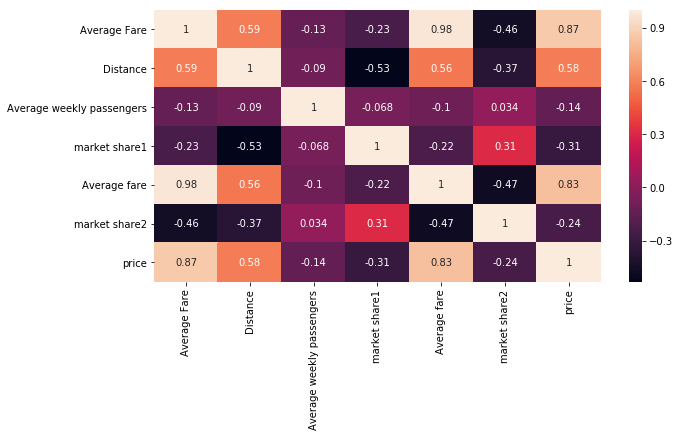

In [39]:
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data=df.corr(), annot=True)

#Treat “Average Fare” – 3rd Column as your Dependent Variable and Rest of the columns as Independent Variable.

In [40]:
y=df.pop('Average Fare')
X=df

In [42]:
X1=pd.DataFrame()
for i, col in enumerate(['Distance','Average weekly passengers','market share1','Average fare','market share2','price']):
    X1[col]=df[col]

In [46]:
X1.head()

,Distance,Average weekly passengers,market share1,Average fare,market share2,price
0,528,424.56,70.19,111.03,70.19,111.03
1,860,276.84,75.10,123.09,17.23,118.94
2,852,215.76,78.89,223.98,2.77,167.12
3,288,606.84,96.97,68.86,96.97,68.86
4,723,313.04,39.79,161.36,15.34,145.42


In [43]:
X2=pd.DataFrame()
for i, col in enumerate(['Distance','market share1','Average fare','price']):
    X2[col]=df[col]

In [47]:
X2.head()

,Distance,market share1,Average fare,price
0,528,70.19,111.03,111.03
1,860,75.10,123.09,118.94
2,852,78.89,223.98,167.12
3,288,96.97,68.86,68.86
4,723,39.79,161.36,145.42


In [45]:
X3=pd.DataFrame()
for i, col in enumerate(['Distance','market share1','market share2','price']):
    X3[col]=df[col]

In [48]:
X3.head()

,Distance,market share1,market share2,price
0,528,70.19,70.19,111.03
1,860,75.10,17.23,118.94
2,852,78.89,2.77,167.12
3,288,96.97,96.97,68.86
4,723,39.79,15.34,145.42


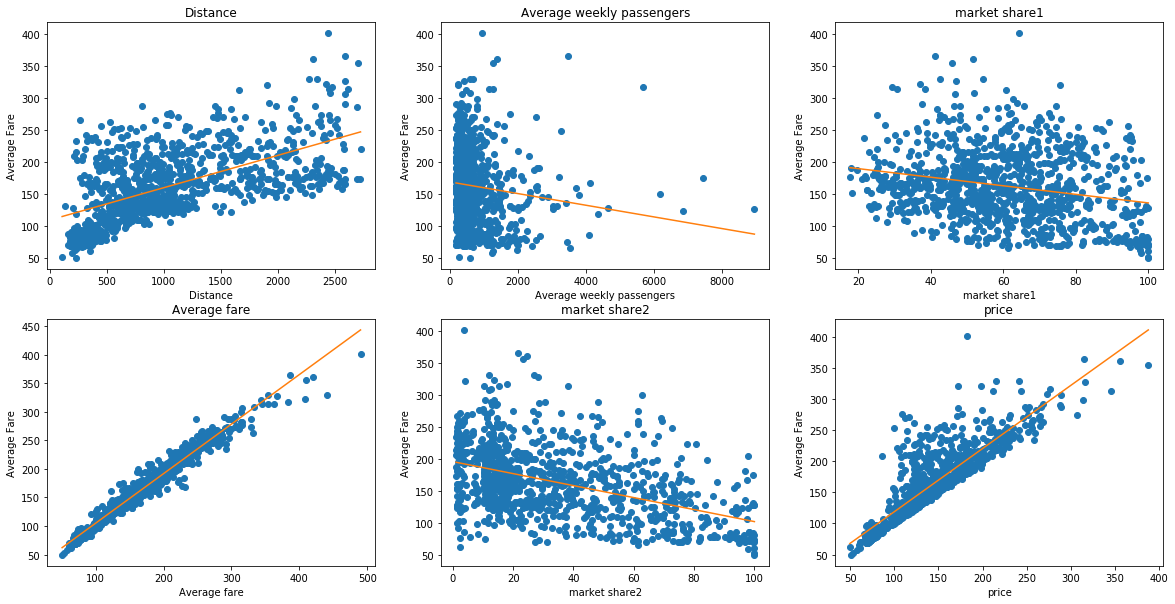

In [49]:
# Plotting the X1 against 'Average Fare'
plt.figure(figsize=(20, 10))

for i, col in enumerate(['Distance','Average weekly passengers','market share1','Average fare','market share2','price']):
    plt.subplot(2, 3, i+1)
    x = X[col]
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Average Fare')

Build Multiple Linear Regression model

In [53]:

lm1 = LinearRegression()
lm1.fit(X1, y)

# print intercept and coefficients
print(lm1.intercept_)
print(lm1.coef_)

10.31501765392943
[ 0.00216398 -0.00100061  0.06411164  0.70826319 -0.06558595  0.21874115]


In [54]:
lm2 = LinearRegression()
lm2.fit(X2, y)

# print intercept and coefficients
print(lm2.intercept_)
print(lm2.coef_)

6.812906026826198
[0.00259128 0.04810379 0.73155957 0.19913076]


In [55]:
lm3 = LinearRegression()
lm3.fit(X2, y)

# print intercept and coefficients
print(lm3.intercept_)
print(lm3.coef_)

6.812906026826198
[0.00259128 0.04810379 0.73155957 0.19913076]


The most important features of this dataset to predict the average fair are Price and Average fare.

In [56]:
x=pd.DataFrame()
for i, col in enumerate(['Average fare','price']):
    x[col]=df[col]

In [57]:
# Functions created for all the models to verify which on eis best
def classifyWithLogisticRegression ( trainingData, results, testData ):
    clf_logreg = LogisticRegression()
    clf_logreg.fit(trainingData, results)
    return clf_logreg.predict(testData)

def classifyWithDecisionTree ( trainingData, results, testData ):
    clf_tree = tree.DecisionTreeClassifier()
    clf_tree.fit(trainingData, results)
    return clf_tree.predict(testData)

def classifyWithKNeighbors ( trainingData, results, testData ):
    clf_KNN = KNeighborsClassifier()
    clf_KNN.fit(trainingData,results)
    return clf_KNN.predict(testData)

def classifyWithGaussianNaiveBayes ( trainingData, results, testData ):
    clf_GaussianNB = GaussianNB()
    clf_GaussianNB.fit(trainingData,results)
    return clf_GaussianNB.predict(testData)

def classifyWithRandomForest ( trainingData, results, testData ):
    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(trainingData, results)
    return random_forest.predict(testData)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 3)

Accuracy score on train and test data with various models

In [60]:
LR_prediction = classifyWithLogisticRegression(X_train, y_train, X_test)
DT_prediction = classifyWithDecisionTree(X_train, y_train, X_test)
KN_prediction = classifyWithKNeighbors(X_train, y_train, X_test)
RF_prediction = classifyWithRandomForest(X_train, y_train, X_test)
NB_prediction = classifyWithGaussianNaiveBayes ( X_train, y_train, X_test )
print("Logistic regressor accuracy is",metrics.accuracy_score(y_test,LR_prediction))
print("Decision Tree regressor accuracy is",metrics.accuracy_score(y_test,DT_prediction))
print("KNeighbors regressor accuracy is",metrics.accuracy_score(y_test,KN_prediction))
print("RandomForest regressor accuracy is",metrics.accuracy_score(y_test,RF_prediction))
print("Naive Base accuracy is",metrics.accuracy_score(y_test,NB_prediction))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic regressor accuracy is 0.023333333333333334
Decision Tree regressor accuracy is 0.06
KNeighbors regressor accuracy is 0.07666666666666666
RandomForest regressor accuracy is 0.05
Naive Base accuracy is 0.08666666666666667


Accuracy between train and test is better in Naivebase model than others

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [62]:
df=pd.concat([x,y],axis=1)

In [63]:
df.head()

,Average fare,price,Average Fare
0,111.03,111.03,114
1,123.09,118.94,122
2,223.98,167.12,214
3,68.86,68.86,69
4,161.36,145.42,158


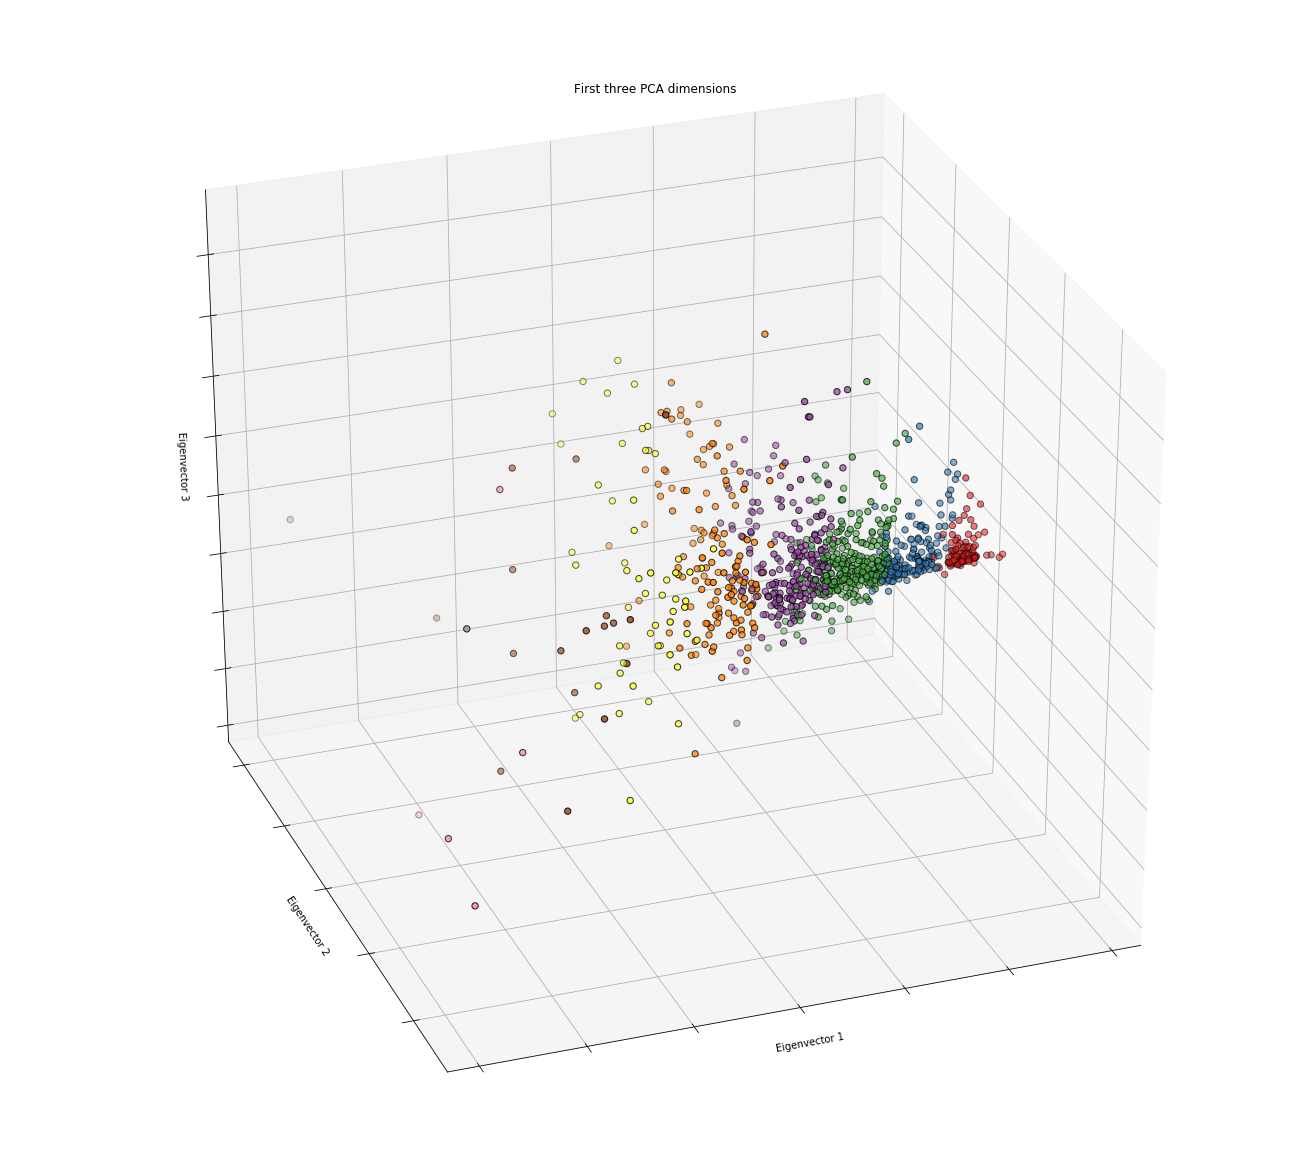

In [64]:
fig = plt.figure(1, figsize=(18, 16))
ax = Axes3D(fig, elev=-150, azim=110)
x_reduced = PCA(n_components=3).fit_transform(df)
ax.scatter(x_reduced[:, 0], x_reduced[:, 1], x_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("Eigenvector 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Eigenvector 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Eigenvector 3")
ax.w_zaxis.set_ticklabels([])
plt.show()